# **Cartpole**

In [1]:
from stable_baselines3 import DQN, A2C
import gymnasium as gym
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import glob
import seaborn as sns

2025-04-03 14:37:22.505014: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 14:37:22.518387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743701842.535098   26749 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743701842.539463   26749 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-03 14:37:22.556398: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## A2C 

In [3]:
run_id = datetime.now().strftime("%Y%m%d_%H%M%S")
tmp_path = f"./results/cartpole/A2C_run_{run_id}"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = A2C(policy = "MlpPolicy", env = env, device="cpu")

model.set_logger(new_logger)
model.learn(total_timesteps=300_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/cartpole/A2C_run_20250403_143832
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 24.4     |
|    ep_rew_mean        | 24.4     |
| time/                 |          |
|    fps                | 1306     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | -0.151   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.84     |
|    value_loss         | 9.55     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 27.4     |
|    ep_rew_mean        | 27.4     |
| time/                 |          |
|    fps                | 1309     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps 

In [ ]:
env = gym.make("CartPole-v1", render_mode='human')
(obs,_) = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()
      break

In [4]:
model.save("./model/cartpole/A2C_CartPole")

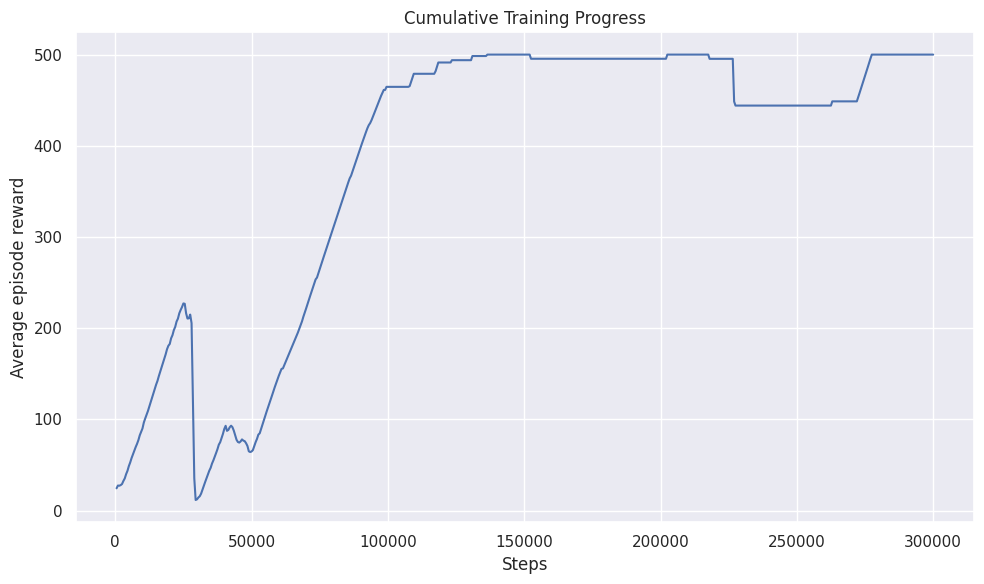

In [5]:
sns.set_theme(style="darkgrid")

# Get all progress.csv files from sorted run folders
base_path = "results/cartpole/"
csv_paths = sorted(glob.glob(os.path.join(base_path, "A2C_run_*/progress.csv")))

all_dfs = []
total_timesteps_offset = 0

for path in csv_paths:
    df = pd.read_csv(path)

    # Adjust total_timesteps to be cumulative
    df['time/total_timesteps'] += total_timesteps_offset
    total_timesteps_offset = df['time/total_timesteps'].iloc[-1]

    all_dfs.append(df)

# Concatenate the adjusted data
combined_df = pd.concat(all_dfs, ignore_index=True)

# Plot as a single line
plt.figure(figsize=(10, 6))
plt.plot(combined_df['time/total_timesteps'], combined_df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('Cumulative Training Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

## DQN 

### Our Previous Hyperparameters

In [6]:
run_id = datetime.now().strftime("%Y%m%d_%H%M%S")
tmp_path = f"./results/cartpole/DQN_run_{run_id}"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = DQN(
    policy = "MlpPolicy",
    env = env,
    device="cpu",
    learning_rate=0.001,
    buffer_size=10_000,
    batch_size=64,
    gamma=0.99,
    target_update_interval=100,
    exploration_fraction=1.5e-3, # explicar de onde veio, aqui é linear, no nosso era expo
    exploration_initial_eps=1.0,
    exploration_final_eps=0.01   
)

            
model.set_logger(new_logger)
model.learn(total_timesteps=300_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/cartpole/DQN_run_20250403_144310
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.872    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 15148    |
|    time_elapsed     | 0        |
|    total_timesteps  | 58       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 15.8     |
|    exploration_rate | 0.723    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5994     |
|    time_elapsed     | 0        |
|    total_timesteps  | 126      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.524    |
|    n_updates        | 6        |
----------------------------------
----------------------------------
|

In [7]:
model.save("./model/cartpole/DQN_CartPole_Our_Hyperparameters")

In [ ]:
env = gym.make("CartPole-v1", render_mode='human')
(obs,_) = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()
      break

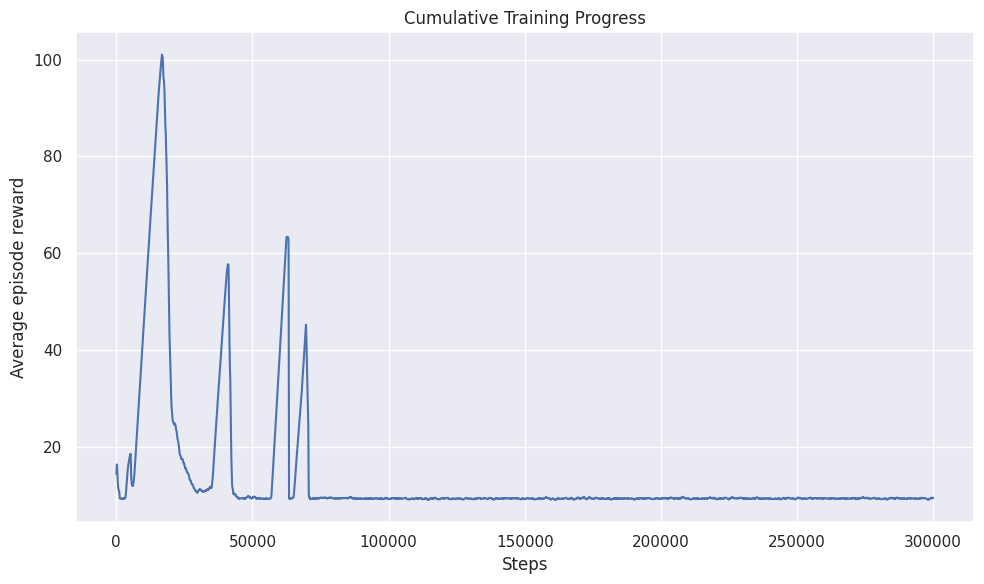

In [8]:
sns.set_theme(style="darkgrid")

# Get all progress.csv files from sorted run folders
base_path = "results/cartpole/"
csv_paths = sorted(glob.glob(os.path.join(base_path, "DQN_run_*/progress.csv")))

all_dfs = []
total_timesteps_offset = 0

for path in csv_paths:
    df = pd.read_csv(path)

    # Adjust total_timesteps to be cumulative
    df['time/total_timesteps'] += total_timesteps_offset
    total_timesteps_offset = df['time/total_timesteps'].iloc[-1]

    all_dfs.append(df)

# Concatenate the adjusted data
combined_df = pd.concat(all_dfs, ignore_index=True)

# Plot as a single line
plt.figure(figsize=(10, 6))
plt.plot(combined_df['time/total_timesteps'], combined_df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('Cumulative Training Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

### Tuned Hyperparameters from: https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/dqn.yml

In [12]:
run_id = datetime.now().strftime("%Y%m%d_%H%M%S")
tmp_path = f"./results/cartpole/DQN_tuned_run_{run_id}"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = DQN(policy="MlpPolicy",
    env=env,
    device="cpu",
    learning_rate=2.3e-3,
    batch_size=64,
    buffer_size=100_000,
    learning_starts=1000,
    gamma=0.99,
    target_update_interval=10,
    train_freq=256,
    gradient_steps=128,
    exploration_fraction=0.16,
    exploration_final_eps=0.04,
    policy_kwargs=dict(net_arch=[256, 256]),
)
            
model.set_logger(new_logger)
model.learn(total_timesteps=300_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/cartpole/DQN_tuned_run_20250403_145030
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.998    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3257     |
|    time_elapsed     | 0        |
|    total_timesteps  | 85       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 19.8     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3767     |
|    time_elapsed     | 0        |
|    total_timesteps  | 158      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.995 

In [13]:
model.save("./model/cartpole/DQN_CartPole_Tunned_Hyperparameters")

In [ ]:
env = gym.make("CartPole-v1", render_mode='human')
(obs,_) = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

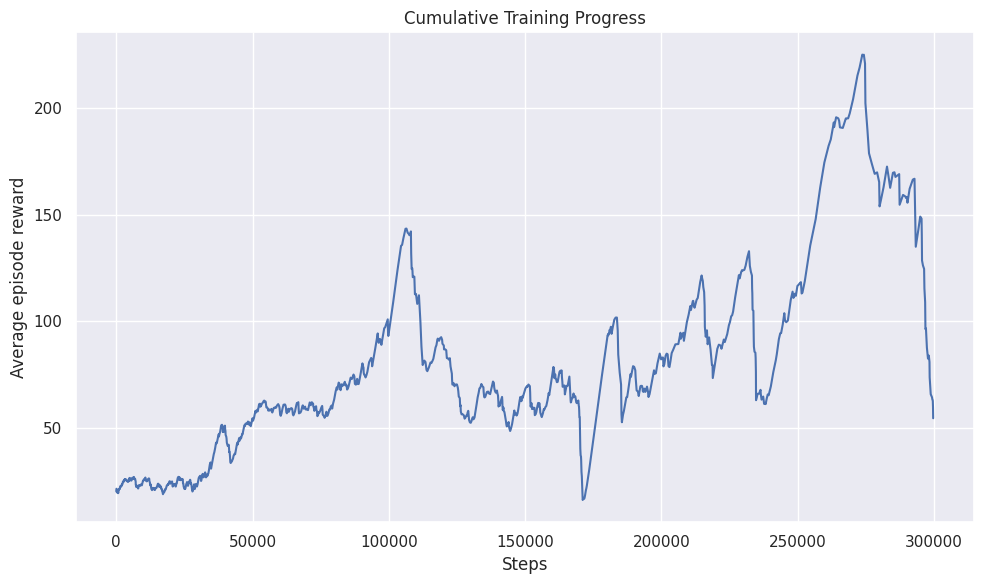

In [14]:
sns.set_theme(style="darkgrid")

# Get all progress.csv files from sorted run folders
base_path = "results/cartpole/"
csv_paths = sorted(glob.glob(os.path.join(base_path, "DQN_tuned_run_*/progress.csv")))

all_dfs = []
total_timesteps_offset = 0

for path in csv_paths:
    df = pd.read_csv(path)

    # Adjust total_timesteps to be cumulative
    df['time/total_timesteps'] += total_timesteps_offset
    total_timesteps_offset = df['time/total_timesteps'].iloc[-1]

    all_dfs.append(df)

# Concatenate the adjusted data
combined_df = pd.concat(all_dfs, ignore_index=True)

# Plot as a single line
plt.figure(figsize=(10, 6))
plt.plot(combined_df['time/total_timesteps'], combined_df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('Cumulative Training Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Comparing the Models**

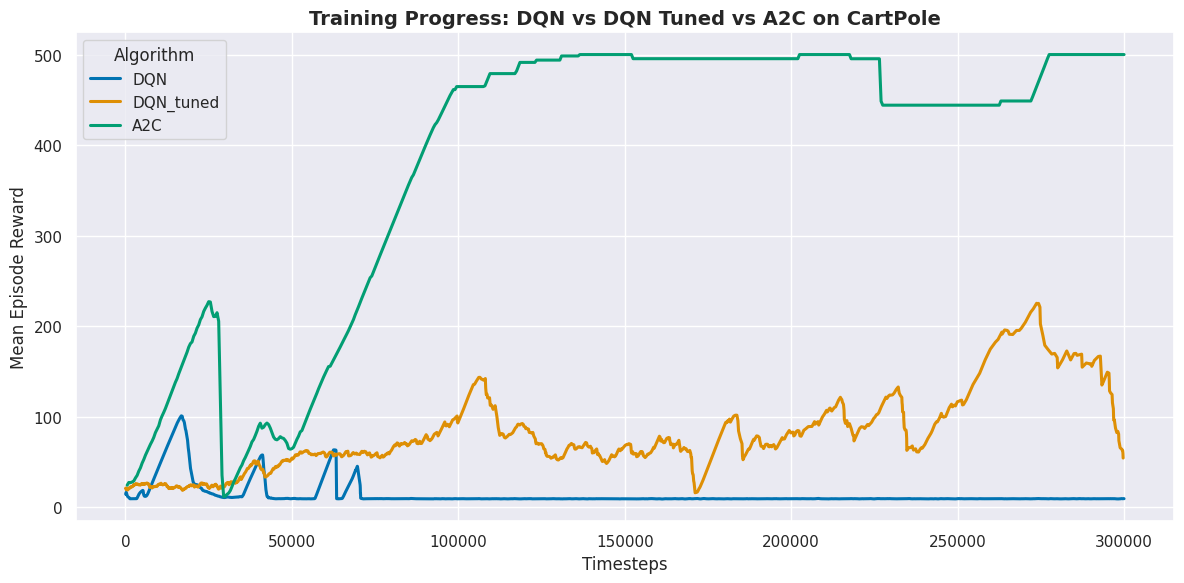

In [15]:
# Apply Seaborn theme
sns.set_theme(style="darkgrid")

def load_progress_curves(base_path: str, algo_prefix: str):
    csv_paths = sorted(glob.glob(os.path.join(base_path, f"{algo_prefix}_run_*/progress.csv")))
    all_dfs = []
    total_timesteps_offset = 0

    for path in csv_paths:
        df = pd.read_csv(path)
        if 'time/total_timesteps' not in df or 'rollout/ep_rew_mean' not in df:
            continue  # skip malformed logs

        df['Algorithm'] = algo_prefix  # Add a column for plotting
        df['time/total_timesteps'] += total_timesteps_offset
        total_timesteps_offset = df['time/total_timesteps'].iloc[-1]
        all_dfs.append(df)

    return pd.concat(all_dfs, ignore_index=True) if all_dfs else pd.DataFrame()

# Load both algorithms
base_path = "results/cartpole/"
dqn_df = load_progress_curves(base_path, "DQN")
dqn_tuned_df = load_progress_curves(base_path, "DQN_tuned")
a2c_df = load_progress_curves(base_path, "A2C")

# Combine both into one DataFrame
combined_df = pd.concat([dqn_df, dqn_tuned_df, a2c_df], ignore_index=True)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=combined_df,
    x='time/total_timesteps',
    y='rollout/ep_rew_mean',
    hue='Algorithm',
    palette='colorblind',
    linewidth=2.2
)
plt.xlabel('Timesteps', fontsize=12)
plt.ylabel('Mean Episode Reward', fontsize=12)
plt.title('Training Progress: DQN vs DQN Tuned vs A2C on CartPole', fontsize=14, weight='bold')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()